# MARQUER Matthieu
## Projet 3: Anticipez les besoins en consommation de bâtiments
![alt text](img/15510245026714_Seattle_logo_landscape_blue-black.png "Seattle")


### Importation des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

import missingno as msno

### Modification des options

In [2]:
# https://pandas.pydata.org/docs/reference/api/pandas.set_option.html
#pd.set_option("display.max_rows", 200)
#pd.set_option("display.max_colwidth", 500)
pd.set_option('display.max_columns', 46)

### Importation des fichiers excel

In [3]:
# Import csv
building = pd.read_csv('data/source/2016_Building_Energy_Benchmarking.csv') 

### 1.0 - Vue global

In [4]:
building.head(2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.0,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86


In [5]:
# Nombre de lignes et de colonnes
building.shape

(3376, 46)

In [6]:
building.describe(include="all")

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3376,3376,3376,3376,3376,3376,3360.000000,3376,3376.000000,3376,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3367,3356,3.356000e+03,1679,1679.000000,596,596.000000,119,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3376,0.0,3376,32,3367.000000,3367.000000
unique,NaN,NaN,8,24,3362,3354,1,1,NaN,3268,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,466,56,NaN,50,NaN,44,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,4,2,NaN,NaN
top,NaN,NaN,NonResidential,Low-Rise Multifamily,Northgate Plaza,2600 SW Barton St,Seattle,WA,NaN,1625049001,NaN,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,NaN,Parking,NaN,Retail Store,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Compliant,Low outlier,NaN,NaN
freq,NaN,NaN,1460,987,3,4,3376,3376,NaN,8,NaN,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,866,1667,NaN,976,NaN,110,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3263,NaN,3211,23,NaN,NaN
mean,21208.991114,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.949107,NaN,4.439277,NaN,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,NaN,NaN,7.917764e+04,NaN,28444.075817,NaN,11738.675166,NaN,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,NaN,NaN,NaN,119.723971,1.175916
std,12223.757015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.615205,NaN,2.120625,NaN,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,NaN,NaN,2.017034e+05,NaN,54392.917928,NaN,29331.199286,NaN,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,NaN,NaN,NaN,538.832227,1.821452
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,1.000000,NaN,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,NaN,NaN,5.656000e+03,NaN,0.000000,NaN,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,3.000000,NaN,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,NaN,NaN,2.509475e+04,NaN,5000.000000,NaN,2239.000000,NaN,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,9.495000,0.210000
50%,23112.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98115.000000,NaN,4.000000,NaN,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,NaN,NaN,3.989400e+04,NaN,10664.000000,NaN,5043.000000,NaN,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,NaN,NaN,NaN,33.920000,0.610000
75%,25994.250000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98122.000000,NaN,7.000000,NaN,47.657115

In [7]:
building.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

In [8]:
# Nombre de valeur manquantes par colonne
building.isna().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [9]:
# Nombre de valeur differentes par colonne
building.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [10]:
# Suppression de variable non pertinente #list a revoir
building = building.drop(columns=["Comments","Outlier","DataYear","City","State"])

<AxesSubplot:>

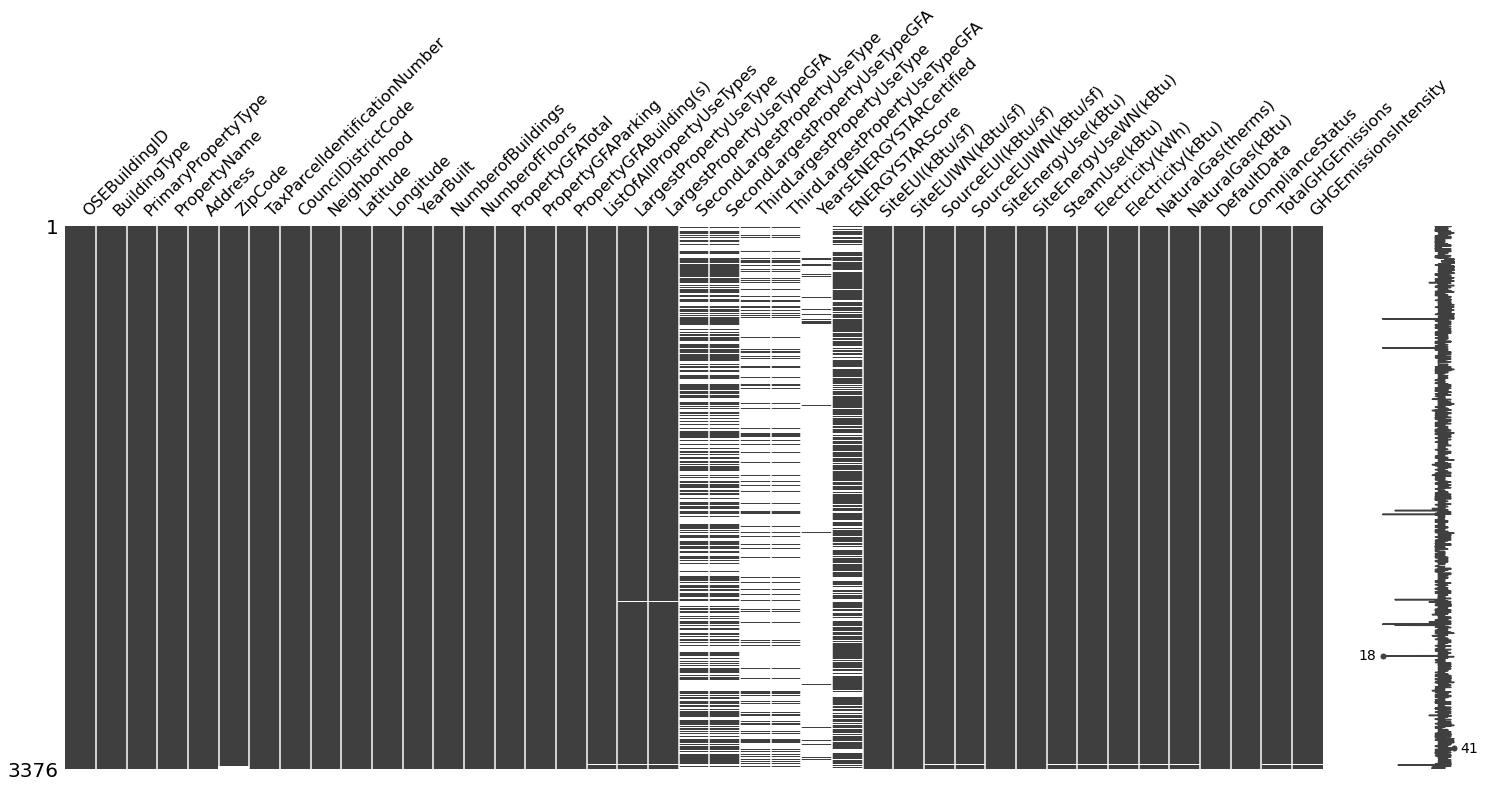

In [11]:
# Visuel des nan
msno.matrix(building)

In [12]:
building.shape

(3376, 41)

In [13]:
# Supprimer les doublons
building = building[~building.duplicated(subset="TaxParcelIdentificationNumber", keep="first")]
building.shape

(3268, 41)

In [14]:
# Supprimer les doublons
building = building[~building.duplicated(subset="PropertyName", keep="first")]
building.shape

(3254, 41)

### Taux de remplissage des variables

In [15]:
# Creation df Valeur manquantes
df_val_manq = pd.DataFrame(building.dtypes.index)
# Rename de 0 en colonne_id
df_val_manq = df_val_manq.rename(columns={0:"colonne_id"})
# Ajout colonne de reference nb de ligne total
df_val_manq["nb_ligne"] = building.shape[0]
# Nombre de valeurs manquantes par colonne
df_val_manq["nb_val_manquantes"] = building.isna().sum().values
# Valeur Non manquantes
df_val_manq["nb_val_non_manq"] = building.notna().sum().values
# Pourcentage 
df_val_manq["pourc"] = df_val_manq.nb_val_non_manq / df_val_manq.nb_ligne * 100
# Trie par pourcentage
df_val_manq = df_val_manq.sort_values(by='pourc',ascending=False)
# Suppression des colonnes inutile
df_val_manq = df_val_manq.drop(columns=["nb_ligne","nb_val_manquantes","nb_val_non_manq"])
df_val_manq

,colonne_id,pourc
0,OSEBuildingID,100.000000
10,Longitude,100.000000
1,BuildingType,100.000000
37,DefaultData,100.000000
38,ComplianceStatus,100.000000
16,PropertyGFABuilding(s),100.000000
15,PropertyGFAParking,100.000000
13,NumberofFloors,100.000000
11,YearBuilt,100.000000
14,PropertyGFATotal,100.000000


In [16]:
building["ListOfAllPropertyUseTypes"].value_counts()

Multifamily Housing                                                          851
Multifamily Housing, Parking                                                 458
K-12 School                                                                  130
Office                                                                       127
Office, Parking                                                              114
                                                                            ... 
Non-Refrigerated Warehouse, Office, Other - Services, Retail Store             1
Distribution Center, Non-Refrigerated Warehouse, Refrigerated Warehouse        1
Other, Parking, Restaurant, Retail Store                                       1
Non-Refrigerated Warehouse, Other, Parking, Retail Store                       1
Fitness Center/Health Club/Gym, Office, Other - Recreation, Swimming Pool      1
Name: ListOfAllPropertyUseTypes, Length: 452, dtype: int64

In [17]:
# Verification Valeur par default
building.DefaultData.value_counts()

False    3142
True      112
Name: DefaultData, dtype: int64

In [18]:
# Garde seulement les batiments ayant aucune valeur rempli par defaut
building = building.loc[building["DefaultData"] == False,:]

In [19]:
# Garde seulement les batiments ayant satisfait aux exigences d'analyse comparative énergétique 
building = building.loc[building["ComplianceStatus"] == "Compliant",:]

In [20]:
# Nombre colonnes avant sup
building.columns.shape

(41,)

In [21]:
# Supprime les 3 derniers car trop peu rempli
building = building.drop(columns = ["YearsENERGYSTARCertified","ThirdLargestPropertyUseType","ThirdLargestPropertyUseTypeGFA"])

In [22]:
# Nombre colonnes après sup
building.columns.shape

(38,)

In [23]:
# Grade seulement les colonnes intéressante #PropertyGFATotal??? TaxParcelIdentificationNumber??? PropertyName??
building = building[["OSEBuildingID", # identifiant unique attribué à chaque propriété 
                     "Longitude", # Longitude de la propriété.
                     "BuildingType", # Classification des types de bâtiments
                    "PropertyGFABuilding(s)", # Superficie totale en pieds carrés entre les surfaces extérieures des murs d'enceinte d'un bâtiment
                    "PropertyGFAParking", # Espace total en pieds carrés de tous les types de stationnement
                    "NumberofFloors", # Nombre d'étages signalés
                    "YearBuilt", # Année au cours de laquelle une propriété a été construite ou a fait l’objet d’une rénovation complète.
                    "Latitude", # Latitude de la propriété.
                    "PrimaryPropertyType", # L'utilisation principale d'une propriété (par exemple, bureau, magasin de détail). L'usage principal est défini comme une fonction qui représente plus de 50 % d'un bien. 
                    "Neighborhood", # Quartier
                    "SiteEnergyUse(kBtu)", # La quantité annuelle d’énergie consommée par la propriété, toutes sources d’énergie confondues.
                   # "SiteEnergyUseWN(kBtu)", # La quantité annuelle d’énergie consommée par la propriété provenant de toutes les sources d’énergie, ajustée à ce que la propriété aurait consommé dans des conditions météorologiques moyennes sur 30 ans.
                   # "SiteEUIWN(kBtu/sf)", # L'intensité de consommation d'énergie du site (EUI) normalisée selon les conditions météorologiques (WN) est l'énergie WN du site d'une propriété divisée par sa superficie brute (en pieds carrés). L’énergie du site WN est la consommation d’énergie du site que la propriété aurait consommée dans des conditions météorologiques moyennes sur 30 ans. L'IUE du site WN est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.
                    "SiteEUI(kBtu/sf)", # L'intensité de consommation d'énergie du site (IUE) est la consommation d'énergie du site d'une propriété divisée par sa superficie brute de plancher. La consommation d'énergie du site est la quantité annuelle de toute l'énergie consommée par la propriété sur place, telle qu'elle est indiquée sur les factures de services publics. L'IUE du site est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.
                    "NumberofBuildings", # Nombre de bâtiments inclus dans le rapport du bien. Dans les cas où une propriété est déclarée comme campus, plusieurs bâtiments peuvent être inclus dans un seul rapport.
                    "TotalGHGEmissions", # La quantité totale d'émissions de gaz à effet de serre, y compris les gaz de dioxyde de carbone, de méthane et d'oxyde d'azote, rejetées dans l'atmosphère en raison de la consommation d'énergie de la propriété, mesurée en tonnes métriques d'équivalent dioxyde de carbone. Ce calcul utilise un facteur d'émission de GES du portefeuille de ressources de production de Seattle CIty Light. Cela utilise le facteur d'émissions 2015 de Seattle City Light de 52,44 livres CO2e/MWh jusqu'à ce que le facteur 2016 soit disponible. Facteur de vapeur Enwave = 170,17 lb CO2e/MMBtu. Facteur de gaz provenant de EPA Portfolio Manager = 53,11 kg CO2e/MBtu.
                    "SourceEUIWN(kBtu/sf)", # L'intensité d'utilisation de l'énergie de la source (EUI) normalisée par les conditions météorologiques (WN) est l'énergie de la source WN d'une propriété divisée par sa superficie brute de plancher. WN Source Energy est la source d’énergie utilisée par la propriété dans des conditions météorologiques moyennes sur 30 ans. WN Source EUI est mesuré en milliers d'unités thermiques britanniques (kBtu) par pied carré.
                   # "NaturalGas(therms)", # La quantité annuelle de gaz naturel fourni par les services publics et consommée par la propriété, mesurée en thermie.
                    "Electricity(kBtu)", # La quantité annuelle d'électricité consommée par la propriété sur place, y compris l'électricité achetée sur le réseau et générée par des systèmes renouvelables sur place, mesurée en milliers d'unités thermiques britanniques (kBtu).
                    "SteamUse(kBtu)", # La quantité annuelle de vapeur urbaine consommée par la propriété sur place, mesurée en milliers d'unités thermiques britanniques (kBtu).
                    "NaturalGas(kBtu)", # La quantité annuelle de gaz naturel fourni par les services publics et consommée par la propriété, mesurée en milliers d'unités thermiques britanniques (kBtu).
                    "GHGEmissionsIntensity", # Émissions totales de gaz à effet de serre divisées par la superficie brute de la propriété, mesurées en kilogrammes d'équivalent dioxyde de carbone par pied carré. Ce calcul utilise un facteur d'émission de GES du portefeuille de ressources de production de Seattle City Light.
                    "SourceEUI(kBtu/sf)", # L'intensité de consommation d'énergie à la source (IUE) est la consommation d'énergie à la source d'une propriété divisée par sa superficie brute de plancher. La consommation d'énergie à la source est l'énergie annuelle utilisée pour faire fonctionner la propriété, y compris les pertes liées à la production, au transport et à la distribution. L'IUE source est mesurée en milliers d'unités thermiques britanniques (kBtu) par pied carré.
                    #####"ListOfAllPropertyUseTypes", # Toutes les utilisations de la propriété signalées 
                    "LargestPropertyUseTypeGFA", # La superficie brute de plancher (SFF) de la plus grande utilisation de la propriété.
                    "LargestPropertyUseType", # La plus grande utilisation d'une propriété (par exemple, bureau, magasin de détail) par GFA.
                    "ENERGYSTARScore"]] # Une EPA a calculé une note de 1 à 100 qui évalue la performance énergétique globale d'une propriété, sur la base de données nationales afin de contrôler les différences entre le climat, les utilisations du bâtiment et les opérations. Un score de 50 représente la médiane nationale.
 #CouncilDistrictCode

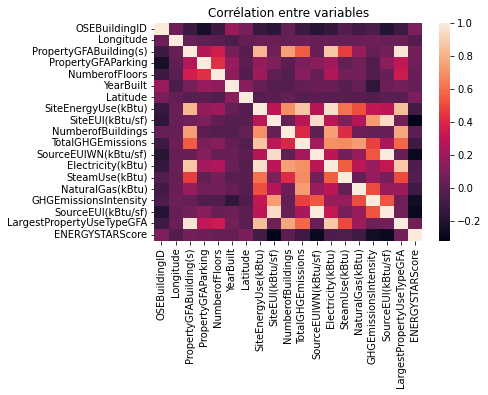

In [24]:
# Corrélation entre variables
sns.heatmap(building.corr())
plt.title("Corrélation entre variables")
plt.show()

In [25]:
building.describe()

,OSEBuildingID,Longitude,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),NumberofBuildings,TotalGHGEmissions,SourceEUIWN(kBtu/sf),Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,ENERGYSTARScore
count,3091.000000,3091.000000,3.091000e+03,3091.000000,3091.000000,3091.000000,3091.000000,3.091000e+03,3091.000000,3088.000000,3087.000000,3087.000000,3.087000e+03,3.087000e+03,3.087000e+03,3087.000000,3087.000000,3.076000e+03,2314.000000
mean,21124.643481,-122.335262,8.769434e+04,8543.578130,4.846328,1968.532837,47.624722,5.499592e+06,54.799224,1.111723,120.491260,138.300227,3.795901e+06,2.668654e+05,1.382598e+06,1.167570,134.586233,7.961695e+04,67.553155
std,11931.258184,0.026483,2.146989e+05,33490.773679,5.624726,33.353667,0.046750,2.240770e+07,56.230782,2.187846,554.093391,139.231483,1.543662e+07,4.003421e+06,6.888205e+06,1.804689,139.393080,2.086630e+05,26.907682
min,1.000000,-122.414250,3.636000e+03,0.000000,0.000000,1900.000000,47.502240,5.713320e+04,1.400000,0.000000,-0.800000,-2.100000,-1.154170e+05,0.000000e+00,0.000000e+00,-0.020000,0.000000,5.656000e+03,1.000000
25%,20062.500000,-122.350425,2.759000e+04,0.000000,2.000000,1947.000000,47.601340,9.316154e+05,28.100000,1.000000,9.535000,78.950001,6.391625e+05,0.000000e+00,0.000000e+00,0.210000,75.199997,2.491850e+04,52.000000
50%,23104.000000,-122.332780,4.298400e+04,0.000000,4.000000,1975.000000,47.618900,1.778432e+06,38.700001,1.000000,33.370000,102.199997,1.175317e+06,0.000000e+00,3.215000e+05,0.610000,96.900002,3.917650e+04,75.000000
75%,25901.500000,-122.320255,8.449850e+04,0.000000,5.000000,1997.000000,47.656730,4.217131e+06,60.299999,1.000000,93.615000,148.050003,2.839602e+06,0.000000e+00,1.180448e+06,1.355000,143.449997,7.730975e+04,90.000000
max,50226.000000,-122.260280,9.320156e+06,512608.000000,99.000000,2015.000000,47.733870,8.739237e+08,834.400024,111.000000,16870.980000,2620.000000,6.570744e+08,1.349435e+08,2.979090e+08,34.090000,2620.000000,9.320156e+06,100.000000


In [26]:
building.shape

(3091, 23)

In [27]:
# Vérification des valeurs unique sur PrimaryPropertyType
list(building.PrimaryPropertyType.unique())

['Hotel',
 'Other',
 'Mid-Rise Multifamily',
 'Mixed Use Property',
 'University',
 'Small- and Mid-Sized Office',
 'Self-Storage Facility',
 'Warehouse',
 'K-12 School',
 'Large Office',
 'Senior Care Community',
 'Medical Office',
 'Retail Store',
 'Hospital',
 'Residence Hall',
 'Distribution Center',
 'Worship Facility',
 'Low-Rise Multifamily',
 'Supermarket / Grocery Store',
 'Laboratory',
 'Refrigerated Warehouse',
 'Restaurant',
 'High-Rise Multifamily']

# Graphique des variables cibles

### TotalGHGEmissions et SiteEnergyUse(kBtu)

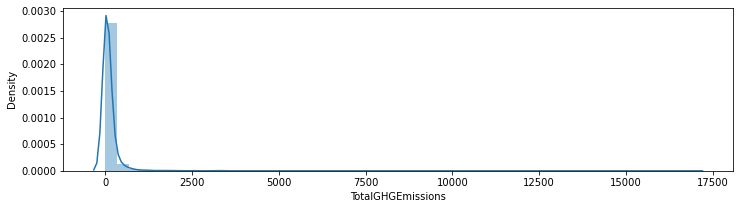

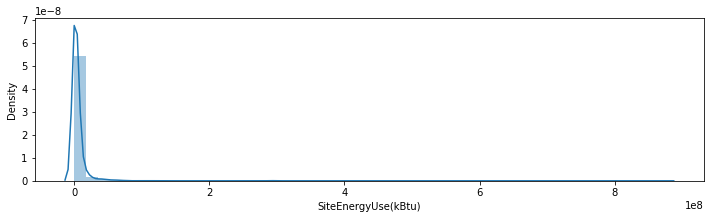

In [28]:
# Liste des colonnes pour histogramme 
list_column = ["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]

# Histogramme
for column in list_column:
    plt.figure(figsize=(12, 3))
    sns.distplot(building[column])
    plt.show()

In [29]:
building[["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]].describe()

,SiteEnergyUse(kBtu),TotalGHGEmissions
count,3.091000e+03,3087.000000
mean,5.499592e+06,120.491260
std,2.240770e+07,554.093391
min,5.713320e+04,-0.800000
25%,9.316154e+05,9.535000
50%,1.778432e+06,33.370000
75%,4.217131e+06,93.615000
max,8.739237e+08,16870.980000


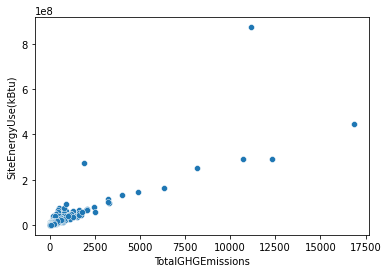

In [30]:
# Nuage de point entre TotalGHGEmissions et SiteEnergyUse(kBtu)
sns.scatterplot(x ="TotalGHGEmissions", y ="SiteEnergyUse(kBtu)", data = building)
plt.show()

In [31]:
building.shape

(3091, 23)

In [32]:
# Enregistrement de la limite sur SiteEnergyUse(kBtu)
limite = building["SiteEnergyUse(kBtu)"].quantile(0.99)
# Suppression des 0.01
building = building.loc[building["SiteEnergyUse(kBtu)"] < limite]
building.shape

(3060, 23)

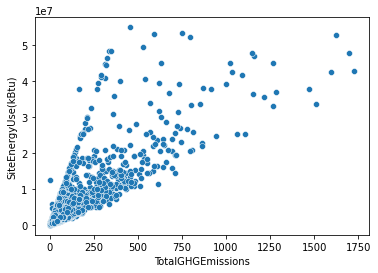

In [33]:
# Nuage de point entre TotalGHGEmissions et SiteEnergyUse(kBtu)
sns.scatterplot(x ="TotalGHGEmissions", y ="SiteEnergyUse(kBtu)", data = building)
plt.show()

In [34]:
# Valeur aberrante sur "SiteEnergyUse(kBtu)"
building.loc[building["SiteEnergyUse(kBtu)"] > 200000000,:]

,OSEBuildingID,Longitude,BuildingType,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,PrimaryPropertyType,Neighborhood,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),NumberofBuildings,TotalGHGEmissions,SourceEUIWN(kBtu/sf),Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,LargestPropertyUseType,ENERGYSTARScore


In [35]:
# Valeur aberrante sur GHGEmissionsIntensity
building.loc[building["GHGEmissionsIntensity"] > 20,:]

,OSEBuildingID,Longitude,BuildingType,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,PrimaryPropertyType,Neighborhood,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),NumberofBuildings,TotalGHGEmissions,SourceEUIWN(kBtu/sf),Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,LargestPropertyUseType,ENERGYSTARScore
809,19900,-122.35507,NonResidential,49249,0,4,1926,47.61763,Laboratory,DOWNTOWN,33268410.0,696.700012,0.0,1266.06,1195.099976,10854749.0,0.0,22413661.0,25.71,1206.699951,40584.0,Laboratory,NaN


# Analyse graphique

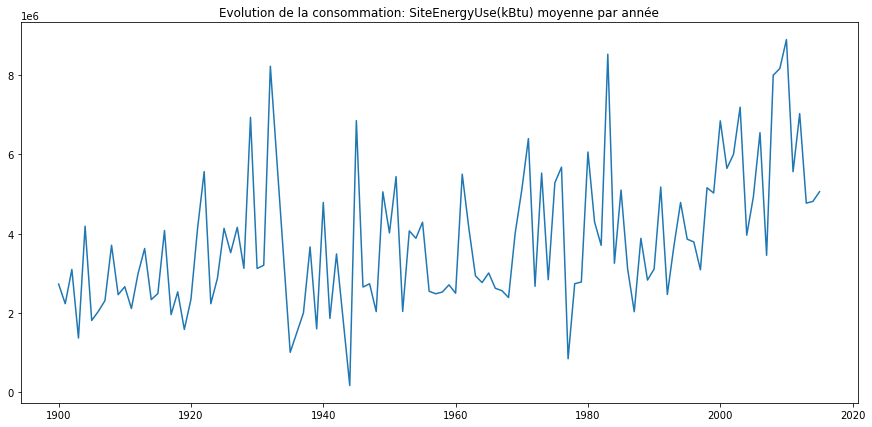

In [36]:
# Moyenne de conso energy groupé par année des batiments
mean_year_energy = building.groupby("YearBuilt")["SiteEnergyUse(kBtu)"].mean().reset_index()

# Moyenne de consomation d'energie par année
plt.figure(figsize=(15,7)) 
plt.title("Evolution de la consommation: SiteEnergyUse(kBtu) moyenne par année")
plt.plot(mean_year_energy["YearBuilt"], mean_year_energy["SiteEnergyUse(kBtu)"])
plt.show()

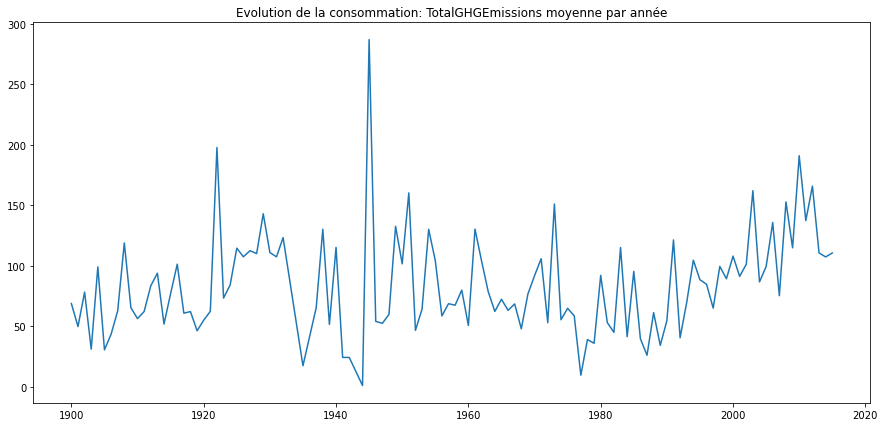

In [37]:
# Moyenne de conso ghg groupé par année des batiments
mean_year_ghg = building.groupby("YearBuilt")["TotalGHGEmissions"].mean().reset_index()

# Moyenne de consomation GHG par année
plt.figure(figsize=(15,7)) 
plt.title("Evolution de la consommation: TotalGHGEmissions moyenne par année")
plt.plot(mean_year_ghg["YearBuilt"], mean_year_ghg["TotalGHGEmissions"])
plt.show()

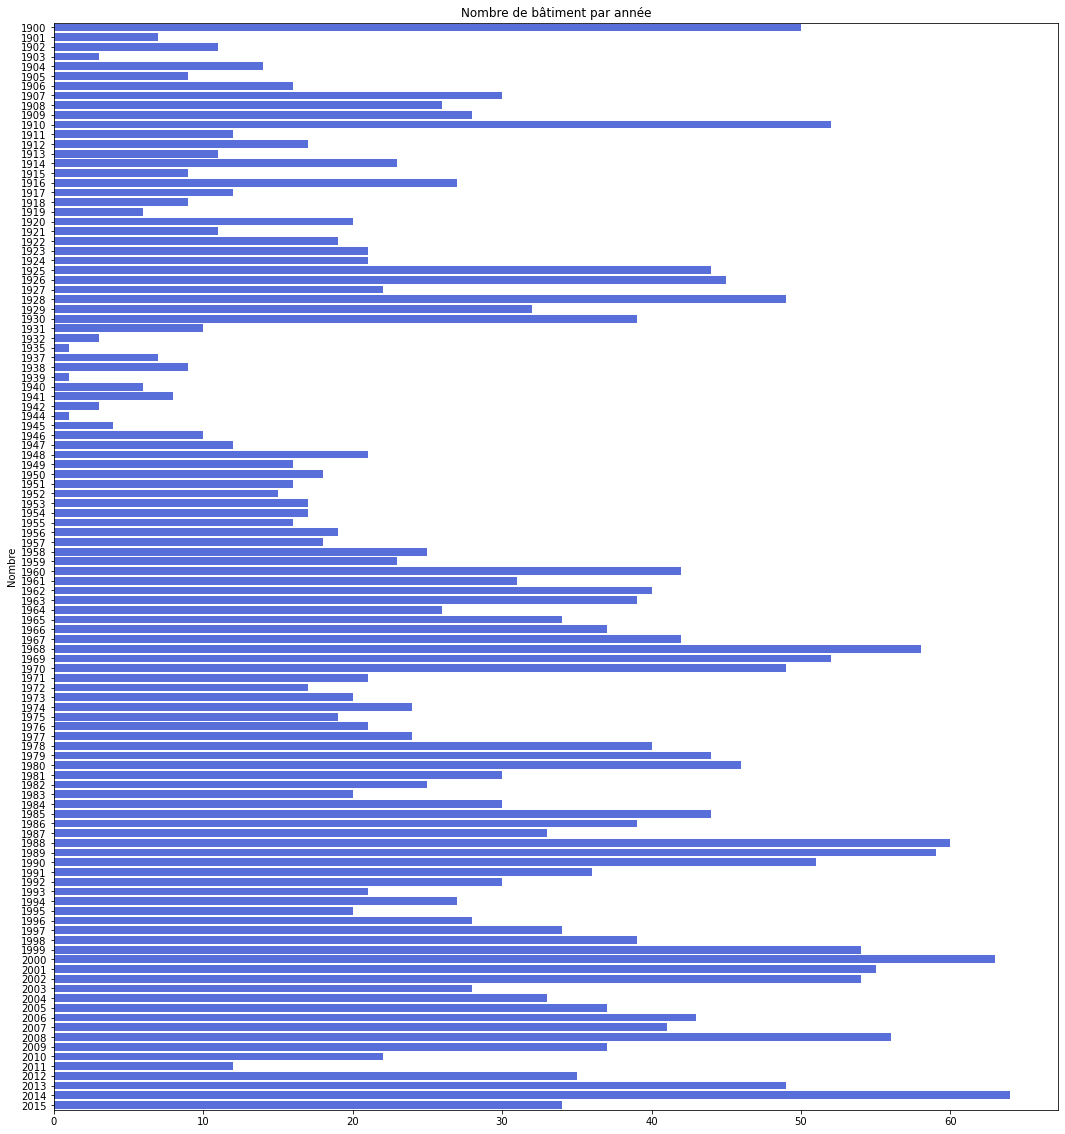

In [38]:
# Nombre de bâtiments par année
plt.figure(figsize=(18,20))
sns.countplot(y='YearBuilt', data=building, color="#4361EE")
plt.title("Nombre de bâtiment par année")
plt.ylabel("Nombre")
plt.xlabel('')
plt.show()

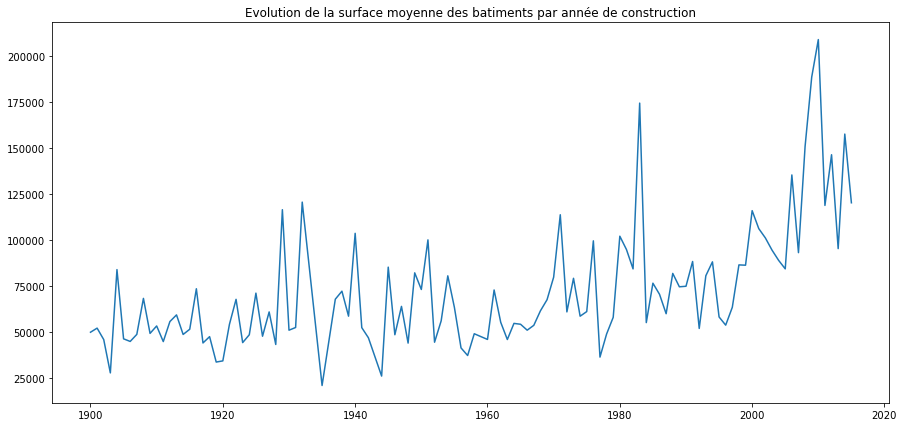

In [39]:
# Evolution de la surface moyenne des batiments par année de construction
mean_year_pGFAb = building.groupby("YearBuilt")["PropertyGFABuilding(s)"].mean().reset_index()

# Evolution de la surface moyenne des batiments par année de construction
plt.figure(figsize=(15,7)) 
plt.title("Evolution de la surface moyenne des batiments par année de construction")
plt.plot(mean_year_pGFAb["YearBuilt"], mean_year_pGFAb["PropertyGFABuilding(s)"])
plt.show()

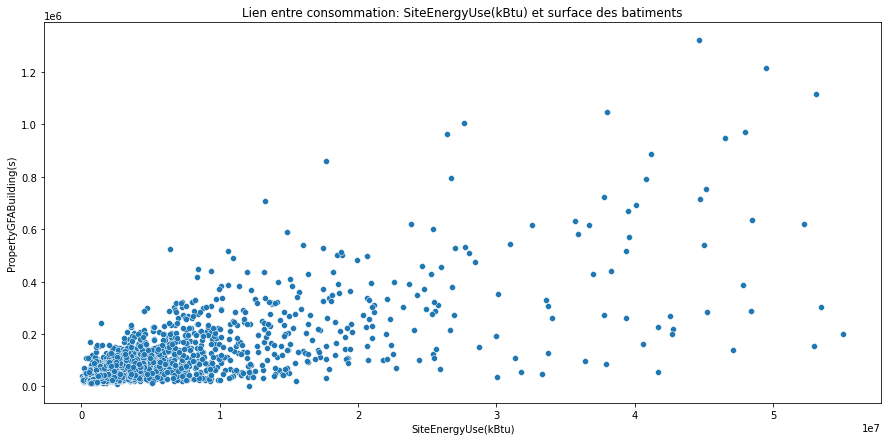

In [40]:
# Lien entre consommation: SiteEnergyUse(kBtu) et surface des batiments
plt.figure(figsize=(15,7)) 
plt.title("Lien entre consommation: SiteEnergyUse(kBtu) et surface des batiments")
sns.scatterplot(x ="SiteEnergyUse(kBtu)", y ="PropertyGFABuilding(s)", data = building)
plt.show()

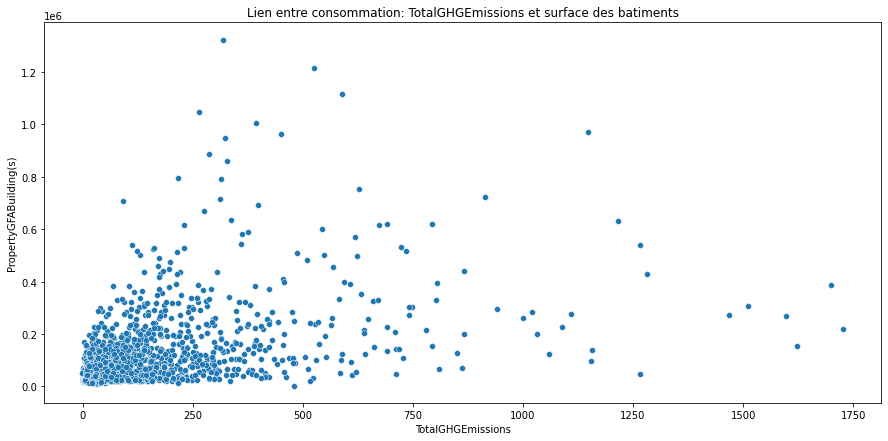

In [41]:
# Lien entre consommation: TotalGHGEmissions et surface des batiments
plt.figure(figsize=(15,7)) 
plt.title("Lien entre consommation: TotalGHGEmissions et surface des batiments")
sns.scatterplot(x ="TotalGHGEmissions", y ="PropertyGFABuilding(s)", data = building)
plt.show()

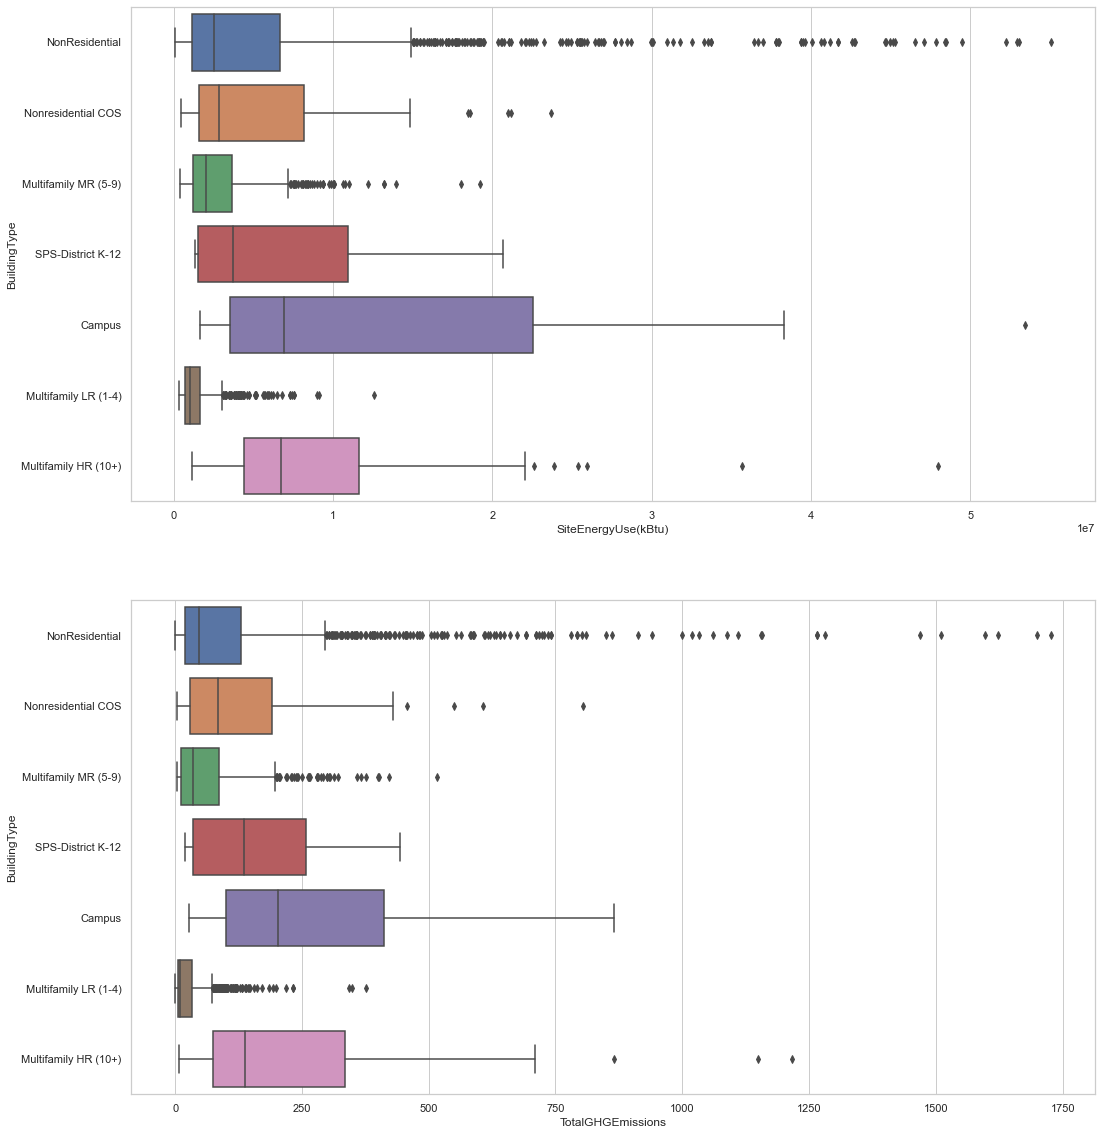

In [42]:
# Graphique par type de bâtiment des variables SiteEnergyUse et TotalGHGEmissions
plt.figure(figsize=(38,20))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=building, y="BuildingType", x="SiteEnergyUse(kBtu)")
plt.subplot(223)
sns.boxplot(data=building, y="BuildingType", x="TotalGHGEmissions")
plt.show()

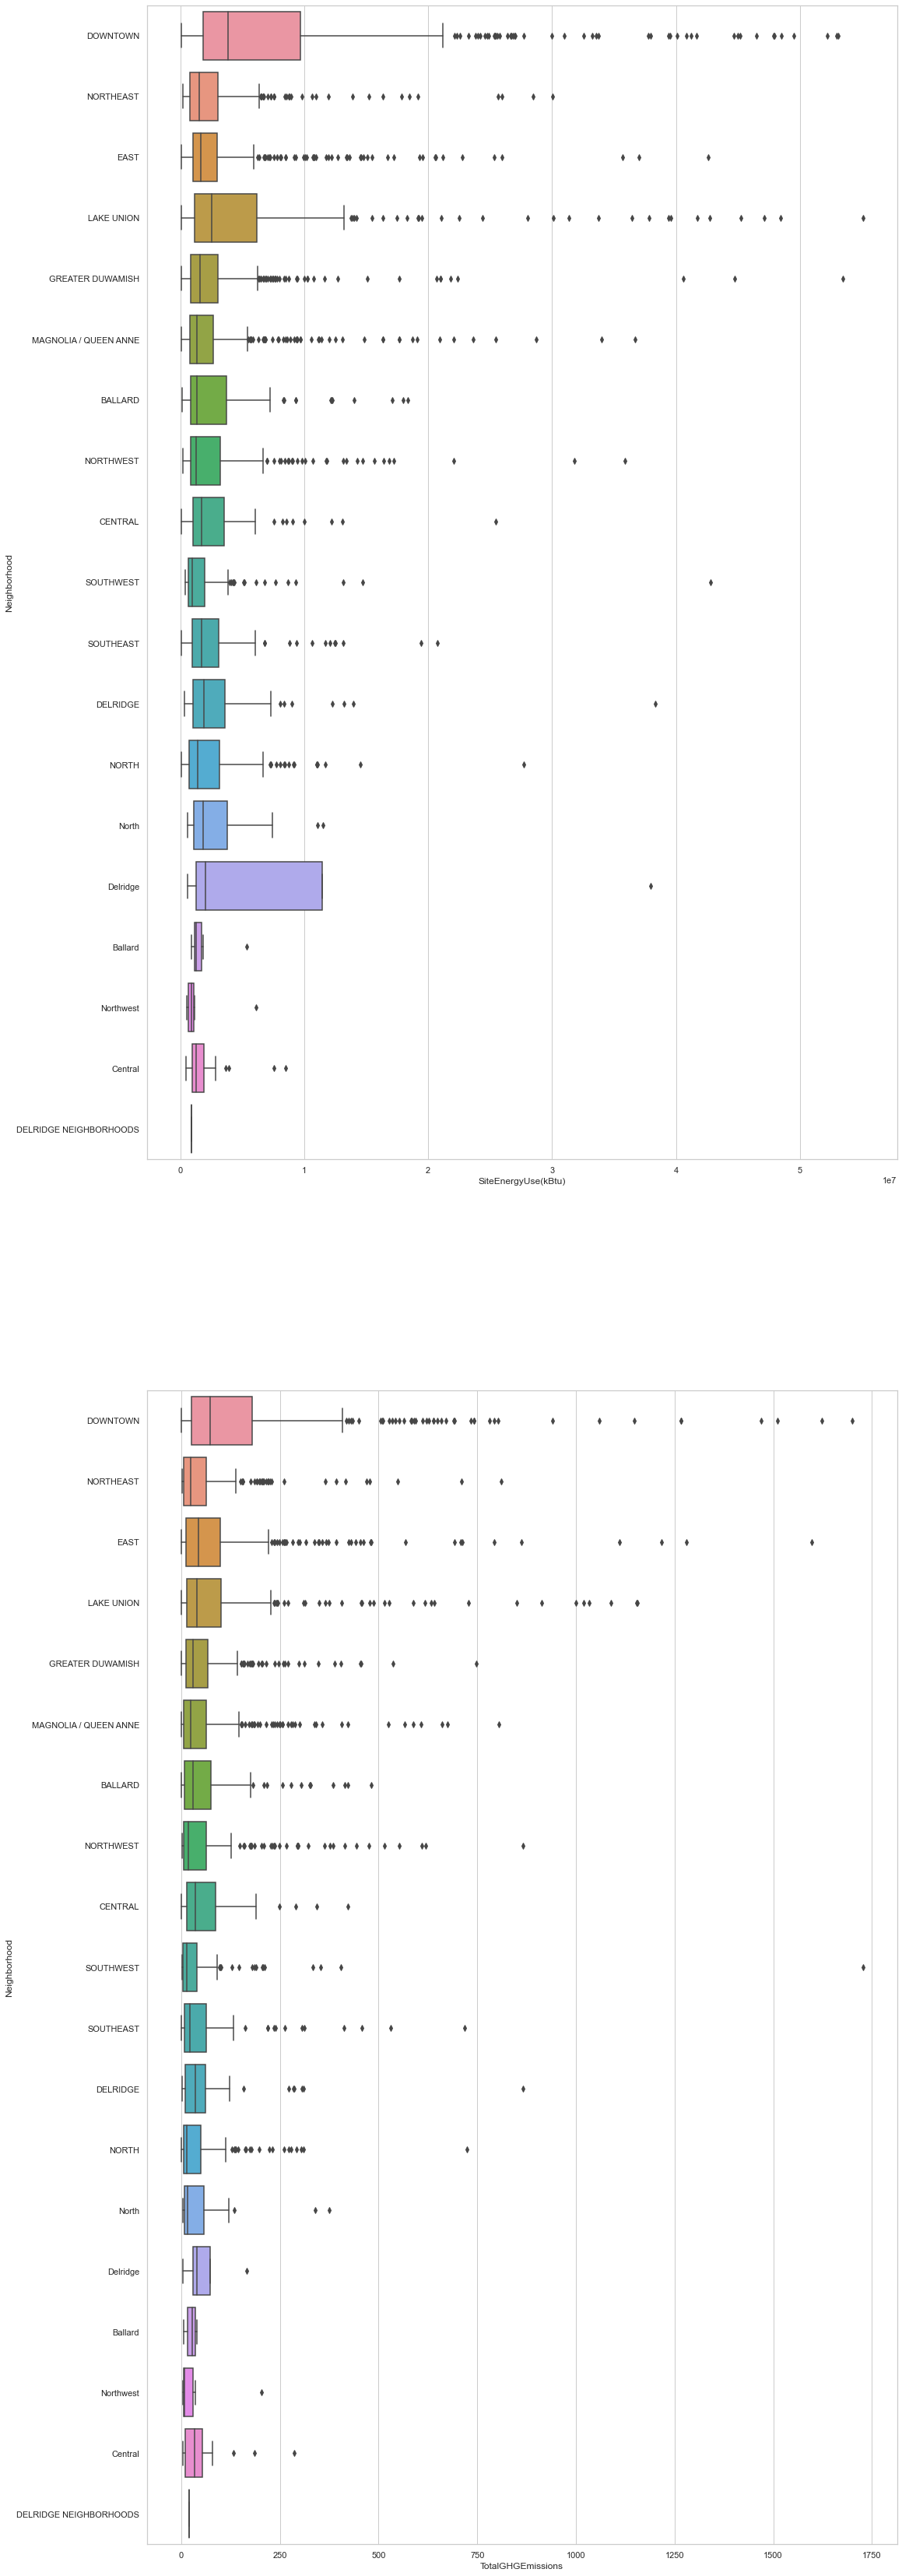

In [43]:
# Graphique par quartier des variables SiteEnergyUse et TotalGHGEmissions
plt.figure(figsize=(38,60))
sns.set(style="whitegrid")
plt.subplot(221)
sns.boxplot(data=building, y="Neighborhood", x="SiteEnergyUse(kBtu)")
plt.subplot(223)
sns.boxplot(data=building, y="Neighborhood", x="TotalGHGEmissions")
plt.show()

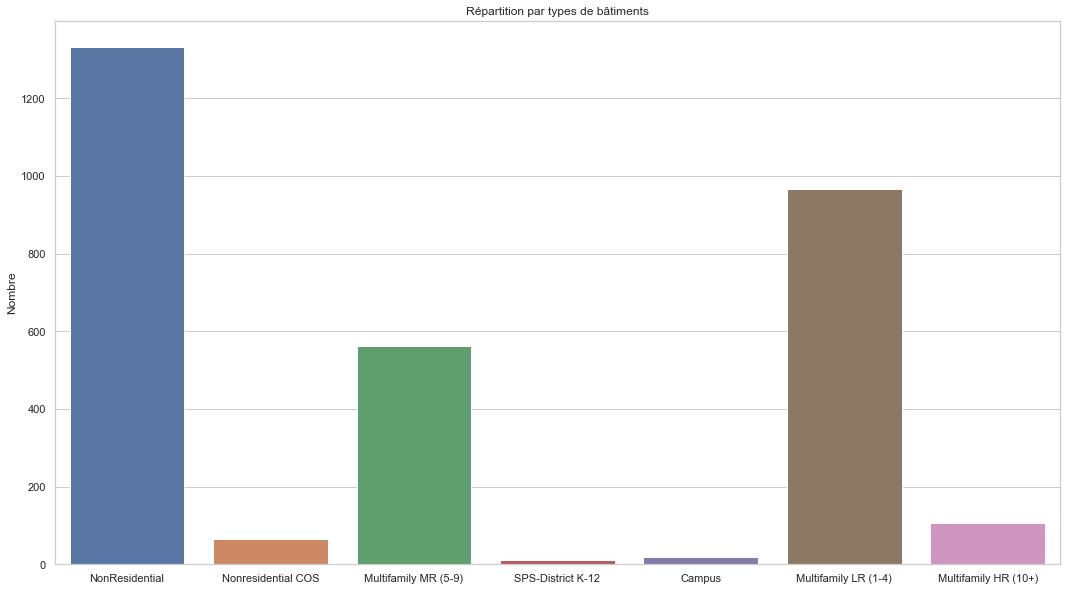

In [44]:
# Répartition des types de bâtiments
plt.figure(figsize=(18,10))
sns.countplot(x='BuildingType', data=building)
plt.title("Répartition par types de bâtiments")
plt.ylabel("Nombre")
plt.xlabel('')
plt.show()

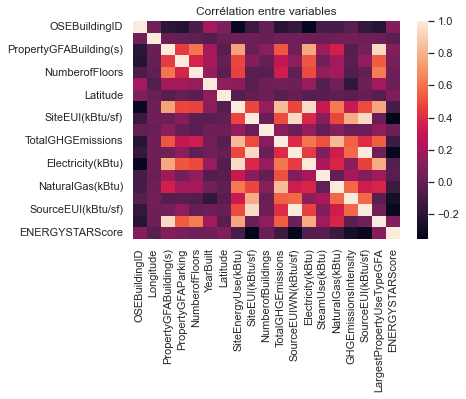

In [45]:
# Corrélation entre variables
sns.heatmap(building.corr())
plt.title("Corrélation entre variables")
plt.show()

In [46]:
# Surface total de chaque batiment
building["Surface_total"] = building["PropertyGFABuilding(s)"]*building["NumberofFloors"]
building

,OSEBuildingID,Longitude,BuildingType,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,PrimaryPropertyType,Neighborhood,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),NumberofBuildings,TotalGHGEmissions,SourceEUIWN(kBtu/sf),Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,LargestPropertyUseType,ENERGYSTARScore,Surface_total
0,1,-122.33799,NonResidential,88434,0,12,1927,47.61220,Hotel,DOWNTOWN,7.226362e+06,81.699997,1.0,249.98,189.000000,3.946027e+06,2003882.00,1.276453e+06,2.83,182.500000,88434.0,Hotel,60.0,1061208
1,2,-122.33393,NonResidential,88502,15064,11,1996,47.61317,Hotel,DOWNTOWN,8.387933e+06,94.800003,1.0,295.86,179.399994,3.242851e+06,0.00,5.145082e+06,2.86,176.100006,83880.0,Hotel,61.0,973522
3,5,-122.33664,NonResidential,61320,0,10,1926,47.61412,Hotel,DOWNTOWN,6.794584e+06,110.800003,1.0,286.43,224.000000,2.768924e+06,2214446.25,1.811213e+06,4.67,216.199997,61320.0,Hotel,56.0,613200
4,8,-122.34047,NonResidential,113580,62000,18,1980,47.61375,Hotel,DOWNTOWN,1.417261e+07,114.800003,1.0,505.01,215.600006,5.368607e+06,0.00,8.803998e+06,2.88,211.399994,123445.0,Hotel,75.0,2044440
5,9,-122.33657,Nonresidential COS,60090,37198,2,1999,47.61623,Other,DOWNTOWN,1.208662e+07,136.100006,1.0,301.81,320.500000,7.371434e+06,0.00,4.715182e+06,3.10,316.299988,88830.0,Police Station,NaN,120180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,50207,-122.39228,Nonresidential COS,16795,0,1,1911,47.67295,Other,BALLARD,9.366165e+05,55.799999,1.0,24.73,129.399994,5.421344e+05,0.00,3.944820e+05,1.47,126.000000,8680.0,Other - Recreation,NaN,16795
3365,50208,-122.37624,Nonresidential COS,12769,0,1,1972,47.67734,Other,BALLARD,5.117308e+06,400.799988,1.0,216.18,638.900024,1.205173e+06,0.00,3.912135e+06,16.93,618.099976,10912.0,Other - Recreation,NaN,12769
3370,50221,-122.37441,Nonresidential COS,18261,0,1,1982,47.54067,Other,DELRIDGE NEIGHBORHOODS,9.320821e+05,51.000000,1.0,20.33,136.600006,6.323620e+05,0.00,2.997200e+05,1.11,126.000000,18261.0,Other - Recreation,NaN,18261
3374,50225,-122.32431,Nonresidential COS,14101,0,1,1989,47.52832,Mixed Use Property,GREATER DUWAMISH,7.194712e+05,51.000000,1.0,22.11,110.800003,3.488702e+05,0.00,3.706010e+05,1.57,105.300003,6601.0,Other - Recreation,NaN,14101


In [47]:
# Ratio surface du batiment par rapport a la surface parking
building["Ratio_GFA_PK"] = building["PropertyGFABuilding(s)"]/building["PropertyGFAParking"]
building

,OSEBuildingID,Longitude,BuildingType,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,PrimaryPropertyType,Neighborhood,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),NumberofBuildings,TotalGHGEmissions,SourceEUIWN(kBtu/sf),Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,LargestPropertyUseType,ENERGYSTARScore,Surface_total,Ratio_GFA_PK
0,1,-122.33799,NonResidential,88434,0,12,1927,47.61220,Hotel,DOWNTOWN,7.226362e+06,81.699997,1.0,249.98,189.000000,3.946027e+06,2003882.00,1.276453e+06,2.83,182.500000,88434.0,Hotel,60.0,1061208,inf
1,2,-122.33393,NonResidential,88502,15064,11,1996,47.61317,Hotel,DOWNTOWN,8.387933e+06,94.800003,1.0,295.86,179.399994,3.242851e+06,0.00,5.145082e+06,2.86,176.100006,83880.0,Hotel,61.0,973522,5.875066
3,5,-122.33664,NonResidential,61320,0,10,1926,47.61412,Hotel,DOWNTOWN,6.794584e+06,110.800003,1.0,286.43,224.000000,2.768924e+06,2214446.25,1.811213e+06,4.67,216.199997,61320.0,Hotel,56.0,613200,inf
4,8,-122.34047,NonResidential,113580,62000,18,1980,47.61375,Hotel,DOWNTOWN,1.417261e+07,114.800003,1.0,505.01,215.600006,5.368607e+06,0.00,8.803998e+06,2.88,211.399994,123445.0,Hotel,75.0,2044440,1.831935
5,9,-122.33657,Nonresidential COS,60090,37198,2,1999,47.61623,Other,DOWNTOWN,1.208662e+07,136.100006,1.0,301.81,320.500000,7.371434e+06,0.00,4.715182e+06,3.10,316.299988,88830.0,Police Station,NaN,120180,1.615409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,50207,-122.39228,Nonresidential COS,16795,0,1,1911,47.67295,Other,BALLARD,9.366165e+05,55.799999,1.0,24.73,129.399994,5.421344e+05,0.00,3.944820e+05,1.47,126.000000,8680.0,Other - Recreation,NaN,16795,inf
3365,50208,-122.37624,Nonresidential COS,12769,0,1,1972,47.67734,Other,BALLARD,5.117308e+06,400.799988,1.0,216.18,638.900024,1.205173e+06,0.00,3.912135e+06,16.93,618.099976,10912.0,Other - Recreation,NaN,12769,inf
3370,50221,-122.37441,Nonresidential COS,18261,0,1,1982,47.54067,Other,DELRIDGE NEIGHBORHOODS,9.320821e+05,51.000000,1.0,20.33,136.600006,6.323620e+05,0.00,2.997200e+05,1.11,126.000000,18261.0,Other - Recreation,NaN,18261,inf
3374,50225,-122.32431,Nonresidential COS,14101,0,1,1989,47.52832,Mixed Use Property,GREATER DUWAMISH,7.194712e+05,51.000000,1.0,22.11,110.800003,3.488702e+05,0.00,3.706010e+05,1.57,105.300003,6601.0,Other - Recreation,NaN,14101,inf


In [48]:
# Remplace les valeurs infini sur Ratio_GFA_PK
building["Ratio_GFA_PK"] = building["Ratio_GFA_PK"].replace(np.inf, 0)
building

,OSEBuildingID,Longitude,BuildingType,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,PrimaryPropertyType,Neighborhood,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),NumberofBuildings,TotalGHGEmissions,SourceEUIWN(kBtu/sf),Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,LargestPropertyUseType,ENERGYSTARScore,Surface_total,Ratio_GFA_PK
0,1,-122.33799,NonResidential,88434,0,12,1927,47.61220,Hotel,DOWNTOWN,7.226362e+06,81.699997,1.0,249.98,189.000000,3.946027e+06,2003882.00,1.276453e+06,2.83,182.500000,88434.0,Hotel,60.0,1061208,0.000000
1,2,-122.33393,NonResidential,88502,15064,11,1996,47.61317,Hotel,DOWNTOWN,8.387933e+06,94.800003,1.0,295.86,179.399994,3.242851e+06,0.00,5.145082e+06,2.86,176.100006,83880.0,Hotel,61.0,973522,5.875066
3,5,-122.33664,NonResidential,61320,0,10,1926,47.61412,Hotel,DOWNTOWN,6.794584e+06,110.800003,1.0,286.43,224.000000,2.768924e+06,2214446.25,1.811213e+06,4.67,216.199997,61320.0,Hotel,56.0,613200,0.000000
4,8,-122.34047,NonResidential,113580,62000,18,1980,47.61375,Hotel,DOWNTOWN,1.417261e+07,114.800003,1.0,505.01,215.600006,5.368607e+06,0.00,8.803998e+06,2.88,211.399994,123445.0,Hotel,75.0,2044440,1.831935
5,9,-122.33657,Nonresidential COS,60090,37198,2,1999,47.61623,Other,DOWNTOWN,1.208662e+07,136.100006,1.0,301.81,320.500000,7.371434e+06,0.00,4.715182e+06,3.10,316.299988,88830.0,Police Station,NaN,120180,1.615409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,50207,-122.39228,Nonresidential COS,16795,0,1,1911,47.67295,Other,BALLARD,9.366165e+05,55.799999,1.0,24.73,129.399994,5.421344e+05,0.00,3.944820e+05,1.47,126.000000,8680.0,Other - Recreation,NaN,16795,0.000000
3365,50208,-122.37624,Nonresidential COS,12769,0,1,1972,47.67734,Other,BALLARD,5.117308e+06,400.799988,1.0,216.18,638.900024,1.205173e+06,0.00,3.912135e+06,16.93,618.099976,10912.0,Other - Recreation,NaN,12769,0.000000
3370,50221,-122.37441,Nonresidential COS,18261,0,1,1982,47.54067,Other,DELRIDGE NEIGHBORHOODS,9.320821e+05,51.000000,1.0,20.33,136.600006,6.323620e+05,0.00,2.997200e+05,1.11,126.000000,18261.0,Other - Recreation,NaN,18261,0.000000
3374,50225,-122.32431,Nonresidential COS,14101,0,1,1989,47.52832,Mixed Use Property,GREATER DUWAMISH,7.194712e+05,51.000000,1.0,22.11,110.800003,3.488702e+05,0.00,3.706010e+05,1.57,105.300003,6601.0,Other - Recreation,NaN,14101,0.000000


In [49]:
# Vérification du batiment n'ayant pas conso electrique ou négative
building.loc[building["Electricity(kBtu)"] <= 0,:] 

,OSEBuildingID,Longitude,BuildingType,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,PrimaryPropertyType,Neighborhood,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),NumberofBuildings,TotalGHGEmissions,SourceEUIWN(kBtu/sf),Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,LargestPropertyUseType,ENERGYSTARScore,Surface_total,Ratio_GFA_PK
426,23854,-122.34115,NonResidential,43728,0,1,1900,47.60613,Restaurant,DOWNTOWN,1.150804e+07,263.200012,1.0,611.19,284.600006,0.0,0.0,11508035.0,13.98,276.299988,43728.0,Restaurant,NaN,43728,0.000000
513,700,-122.37734,NonResidential,57176,0,1,2008,47.63718,Supermarket / Grocery Store,MAGNOLIA / QUEEN ANNE,1.252517e+07,208.800003,1.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.000000,39500.0,Supermarket/Grocery Store,31.0,57176,0.000000
1323,21524,-122.32866,Multifamily LR (1-4),32626,4735,4,1974,47.64272,Low-Rise Multifamily,LAKE UNION,8.801155e+05,31.700001,1.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.000000,27732.0,Multifamily Housing,61.0,130504,6.890391
3206,49784,-122.31257,NonResidential,52000,0,6,2013,47.61432,Small- and Mid-Sized Office,CENTRAL,3.427261e+05,7.100000,1.0,-0.80,-2.100000,-115417.0,0.0,0.0,-0.02,2.000000,48159.0,Office,100.0,312000,0.000000


In [50]:
# Liste unique sur variable BuildingType
list(building.BuildingType.unique())               

['NonResidential',
 'Nonresidential COS',
 'Multifamily MR (5-9)',
 'SPS-District K-12',
 'Campus',
 'Multifamily LR (1-4)',
 'Multifamily HR (10+)']

In [51]:
# Garde les batiments non résidentiel 
residentiel = ['Multifamily MR (5-9)','SPS-District K-12','Campus','Multifamily LR (1-4)','Multifamily HR (10+)']
building = building.loc[~building["BuildingType"].isin(residentiel)]
building
# Revoir: vérifier les spec des differents BuildingType
# SPS-District K-12: Seattle Public Schools

,OSEBuildingID,Longitude,BuildingType,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,PrimaryPropertyType,Neighborhood,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),NumberofBuildings,TotalGHGEmissions,SourceEUIWN(kBtu/sf),Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,LargestPropertyUseType,ENERGYSTARScore,Surface_total,Ratio_GFA_PK
0,1,-122.33799,NonResidential,88434,0,12,1927,47.61220,Hotel,DOWNTOWN,7.226362e+06,81.699997,1.0,249.98,189.000000,3.946027e+06,2003882.00,1.276453e+06,2.83,182.500000,88434.0,Hotel,60.0,1061208,0.000000
1,2,-122.33393,NonResidential,88502,15064,11,1996,47.61317,Hotel,DOWNTOWN,8.387933e+06,94.800003,1.0,295.86,179.399994,3.242851e+06,0.00,5.145082e+06,2.86,176.100006,83880.0,Hotel,61.0,973522,5.875066
3,5,-122.33664,NonResidential,61320,0,10,1926,47.61412,Hotel,DOWNTOWN,6.794584e+06,110.800003,1.0,286.43,224.000000,2.768924e+06,2214446.25,1.811213e+06,4.67,216.199997,61320.0,Hotel,56.0,613200,0.000000
4,8,-122.34047,NonResidential,113580,62000,18,1980,47.61375,Hotel,DOWNTOWN,1.417261e+07,114.800003,1.0,505.01,215.600006,5.368607e+06,0.00,8.803998e+06,2.88,211.399994,123445.0,Hotel,75.0,2044440,1.831935
5,9,-122.33657,Nonresidential COS,60090,37198,2,1999,47.61623,Other,DOWNTOWN,1.208662e+07,136.100006,1.0,301.81,320.500000,7.371434e+06,0.00,4.715182e+06,3.10,316.299988,88830.0,Police Station,NaN,120180,1.615409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,50207,-122.39228,Nonresidential COS,16795,0,1,1911,47.67295,Other,BALLARD,9.366165e+05,55.799999,1.0,24.73,129.399994,5.421344e+05,0.00,3.944820e+05,1.47,126.000000,8680.0,Other - Recreation,NaN,16795,0.000000
3365,50208,-122.37624,Nonresidential COS,12769,0,1,1972,47.67734,Other,BALLARD,5.117308e+06,400.799988,1.0,216.18,638.900024,1.205173e+06,0.00,3.912135e+06,16.93,618.099976,10912.0,Other - Recreation,NaN,12769,0.000000
3370,50221,-122.37441,Nonresidential COS,18261,0,1,1982,47.54067,Other,DELRIDGE NEIGHBORHOODS,9.320821e+05,51.000000,1.0,20.33,136.600006,6.323620e+05,0.00,2.997200e+05,1.11,126.000000,18261.0,Other - Recreation,NaN,18261,0.000000
3374,50225,-122.32431,Nonresidential COS,14101,0,1,1989,47.52832,Mixed Use Property,GREATER DUWAMISH,7.194712e+05,51.000000,1.0,22.11,110.800003,3.488702e+05,0.00,3.706010e+05,1.57,105.300003,6601.0,Other - Recreation,NaN,14101,0.000000


# OneHotEncoder

In [52]:
# Recherche des variables categ
categ = building.select_dtypes("object").columns
categ

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType'],
      dtype='object')

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
encoder = OneHotEncoder()
encoder.fit_transform(building[categ]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [55]:
# Enregistrement
feature_arry = encoder.fit_transform(building[categ]).toarray()

In [56]:
encoder.categories_

[array(['NonResidential', 'Nonresidential COS'], dtype=object),
 array(['Distribution Center', 'Hospital', 'Hotel', 'K-12 School',
        'Laboratory', 'Large Office', 'Low-Rise Multifamily',
        'Medical Office', 'Mixed Use Property', 'Other',
        'Refrigerated Warehouse', 'Residence Hall', 'Restaurant',
        'Retail Store', 'Self-Storage Facility', 'Senior Care Community',
        'Small- and Mid-Sized Office', 'Supermarket / Grocery Store',
        'University', 'Warehouse', 'Worship Facility'], dtype=object),
 array(['BALLARD', 'Ballard', 'CENTRAL', 'Central', 'DELRIDGE',
        'DELRIDGE NEIGHBORHOODS', 'DOWNTOWN', 'Delridge', 'EAST',
        'GREATER DUWAMISH', 'LAKE UNION', 'MAGNOLIA / QUEEN ANNE', 'NORTH',
        'NORTHEAST', 'NORTHWEST', 'North', 'Northwest', 'SOUTHEAST',
        'SOUTHWEST'], dtype=object),
 array(['Adult Education', 'Automobile Dealership', 'Bank Branch',
        'College/University', 'Courthouse', 'Data Center',
        'Distribution Center', 

In [57]:
# Enregistrement
feature_labels = encoder.get_feature_names_out(input_features=None)
feature_labels

array(['BuildingType_NonResidential', 'BuildingType_Nonresidential COS',
       'PrimaryPropertyType_Distribution Center',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School',
       'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall',
       'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community',
       'PrimaryPropertyType_Small- and Mid-Sized Office',
       'PrimaryPropertyType_Supermarket / Grocery Store',
       'PrimaryPropertyType_University', 'PrimaryPropertyType_Warehouse',
       'PrimaryPropertyTyp

In [58]:
data = pd.DataFrame(feature_arry, columns = feature_labels, index = building.index)
data

,BuildingType_NonResidential,BuildingType_Nonresidential COS,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,...,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,LargestPropertyUseType_nan
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3365,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3370,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3374,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Fin One Hot

In [60]:
# Dataframe des valeurs numerique
data_num = building.select_dtypes(["int64","float64"]) 
#data_num = data_num.drop(columns="OSEBuildingID")
data_num 

,OSEBuildingID,Longitude,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),NumberofBuildings,TotalGHGEmissions,SourceEUIWN(kBtu/sf),Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,ENERGYSTARScore,Surface_total,Ratio_GFA_PK
0,1,-122.33799,88434,0,12,1927,47.61220,7.226362e+06,81.699997,1.0,249.98,189.000000,3.946027e+06,2003882.00,1.276453e+06,2.83,182.500000,88434.0,60.0,1061208,0.000000
1,2,-122.33393,88502,15064,11,1996,47.61317,8.387933e+06,94.800003,1.0,295.86,179.399994,3.242851e+06,0.00,5.145082e+06,2.86,176.100006,83880.0,61.0,973522,5.875066
3,5,-122.33664,61320,0,10,1926,47.61412,6.794584e+06,110.800003,1.0,286.43,224.000000,2.768924e+06,2214446.25,1.811213e+06,4.67,216.199997,61320.0,56.0,613200,0.000000
4,8,-122.34047,113580,62000,18,1980,47.61375,1.417261e+07,114.800003,1.0,505.01,215.600006,5.368607e+06,0.00,8.803998e+06,2.88,211.399994,123445.0,75.0,2044440,1.831935
5,9,-122.33657,60090,37198,2,1999,47.61623,1.208662e+07,136.100006,1.0,301.81,320.500000,7.371434e+06,0.00,4.715182e+06,3.10,316.299988,88830.0,NaN,120180,1.615409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,50207,-122.39228,16795,0,1,1911,47.67295,9.366165e+05,55.799999,1.0,24.73,129.399994,5.421344e+05,0.00,3.944820e+05,1.47,126.000000,8680.0,NaN,16795,0.000000
3365,50208,-122.37624,12769,0,1,1972,47.67734,5.117308e+06,400.799988,1.0,216.18,638.900024,1.205173e+06,0.00,3.912135e+06,16.93,618.099976,10912.0,NaN,12769,0.000000
3370,50221,-122.37441,18261,0,1,1982,47.54067,9.320821e+05,51.000000,1.0,20.33,136.600006,6.323620e+05,0.00,2.997200e+05,1.11,126.000000,18261.0,NaN,18261,0.000000
3374,50225,-122.32431,14101,0,1,1989,47.52832,7.194712e+05,51.000000,1.0,22.11,110.800003,3.488702e+05,0.00,3.706010e+05,1.57,105.300003,6601.0,NaN,14101,0.000000


In [61]:
# Enregistrement des noms de columns (exclu OSEBuildingID)
numerique = data_num[data_num.columns[1:]].columns
numerique

Index(['Longitude', 'PropertyGFABuilding(s)', 'PropertyGFAParking',
       'NumberofFloors', 'YearBuilt', 'Latitude', 'SiteEnergyUse(kBtu)',
       'SiteEUI(kBtu/sf)', 'NumberofBuildings', 'TotalGHGEmissions',
       'SourceEUIWN(kBtu/sf)', 'Electricity(kBtu)', 'SteamUse(kBtu)',
       'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'SourceEUI(kBtu/sf)',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'Surface_total',
       'Ratio_GFA_PK'],
      dtype='object')

In [62]:
from sklearn.preprocessing import StandardScaler
# Instanciation
scaler = StandardScaler()
# Standarbisation Transformation – centrage-réduction
data_num[numerique] = scaler.fit_transform(data_num[numerique])
data_num

,OSEBuildingID,Longitude,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),NumberofBuildings,TotalGHGEmissions,SourceEUIWN(kBtu/sf),Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,ENERGYSTARScore,Surface_total,Ratio_GFA_PK
0,1,-0.182176,0.011105,-0.329563,1.297307,-1.011690,-0.102666,0.153728,0.144611,-0.032343,0.659251,0.069882,-0.049640,1.358883,-0.037993,0.597002,0.048550,0.078043,-0.145911,0.044886,-0.301115
1,2,-0.005405,0.011638,0.039145,1.133131,1.079575,-0.081863,0.290019,0.330029,-0.032343,0.891757,0.014204,-0.151315,-0.164365,1.379810,0.611048,0.011341,0.038137,-0.111143,0.023891,1.929597
3,5,-0.123398,-0.201131,-0.329563,0.968955,-1.041999,-0.061489,0.103066,0.556493,-0.032343,0.843968,0.272875,-0.219842,1.518943,0.157990,1.458441,0.244481,-0.159556,-0.284983,-0.062379,-0.301115
4,8,-0.290155,0.207937,1.187954,2.282362,0.594644,-0.069424,0.968752,0.613110,-0.032343,1.951665,0.224157,0.156056,-0.164365,2.720755,0.620411,0.216574,0.384844,0.375610,0.280297,0.394455
5,9,-0.120350,-0.210759,0.580898,-0.344452,1.170499,-0.016239,0.723996,0.914590,-0.032343,0.921910,0.832554,0.445653,-0.164365,1.222257,0.723409,0.826457,0.081513,NaN,-0.180421,0.312242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,50207,-2.545942,-0.549654,-0.329563,-0.508628,-1.496621,1.200173,-0.584267,-0.221978,-0.032343,-0.482247,-0.275785,-0.541823,-0.164365,-0.361224,-0.039713,-0.279938,-0.620840,NaN,-0.205174,-0.301115
3365,50208,-1.847567,-0.581167,-0.329563,-0.508628,0.352178,1.294320,-0.093733,4.661162,-0.032343,0.487963,2.679207,-0.445952,-0.164365,0.927951,7.198240,2.581107,-0.601281,NaN,-0.206138,-0.301115
3370,50221,-1.767889,-0.538178,-0.329563,-0.508628,0.655260,-1.636690,-0.584799,-0.289917,-0.032343,-0.504545,-0.234027,-0.528777,-0.164365,-0.395953,-0.208255,-0.279938,-0.536882,NaN,-0.204823,-0.301115
3374,50225,0.413446,-0.570741,-0.329563,-0.508628,0.867417,-1.901547,-0.609745,-0.289917,-0.032343,-0.495525,-0.383661,-0.569768,-0.164365,-0.369976,0.007105,-0.400287,-0.639058,NaN,-0.205819,-0.301115


In [63]:
# Merge des 2 df (numerique et categoriel(onehot))
data = pd.merge(data_num, data, left_index=True, right_index=True, how="left")
data

,OSEBuildingID,Longitude,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),NumberofBuildings,TotalGHGEmissions,SourceEUIWN(kBtu/sf),Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,ENERGYSTARScore,Surface_total,Ratio_GFA_PK,BuildingType_NonResidential,BuildingType_Nonresidential COS,...,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,LargestPropertyUseType_nan
0,1,-0.182176,0.011105,-0.329563,1.297307,-1.011690,-0.102666,0.153728,0.144611,-0.032343,0.659251,0.069882,-0.049640,1.358883,-0.037993,0.597002,0.048550,0.078043,-0.145911,0.044886,-0.301115,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,-0.005405,0.011638,0.039145,1.133131,1.079575,-0.081863,0.290019,0.330029,-0.032343,0.891757,0.014204,-0.151315,-0.164365,1.379810,0.611048,0.011341,0.038137,-0.111143,0.023891,1.929597,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,-0.123398,-0.201131,-0.329563,0.968955,-1.041999,-0.061489,0.103066,0.556493,-0.032343,0.843968,0.272875,-0.219842,1.518943,0.157990,1.458441,0.244481,-0.159556,-0.284983,-0.062379,-0.301115,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,-0.290155,0.207937,1.187954,2.282362,0.594644,-0.069424,0.968752,0.613110,-0.032343,1.951665,0.224157,0.156056,-0.164365,2.720755,0.620411,0.216574,0.384844,0.375610,0.280297,0.394455,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,9,-0.120350,-0.210759,0.580898,-0.344452,1.170499,-0.016239,0.723996,0.914590,-0.032343,0.921910,0.832554,0.445653,-0.164365,1.222257,0.723409,0.826457,0.081513,NaN,-0.180421,0.312242,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,50207,-2.545942,-0.549654,-0.329563,-0.508628,-1.496621,1.200173,-0.584267,-0.221978,-0.032343,-0.482247,-0.275785,-0.541823,-0.164365,-0.361224,-0.039713,-0.279938,-0.620840,NaN,-0.205174,-0.301115,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3365,50208,-1.847567,-0.581167,-0.329563,-0.508628,0.352178,1.294320,-0.093733,4.661162,-0.032343,0.487963,2.679207,-0.445952,-0.164365,0.927951,7.198240,2.581107,-0.601281,NaN,-0.206138,-0.301115,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3370,50221,-1.767889,-0.538178,-0.329563,-0.508628,0.655260,-1.636690,-0.584799,-0.289917,-0.032343,-0.504545,-0.234027,-0.528777,-0.164365,-0.395953,-0.208255,-0.279938,-0.536882,NaN,-0.204823,-0.301115,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

### Binarisation de "SiteEnergyUse(kBtu)" et "TotalGHGEmissions"

In [64]:
# SiteEnergyUse(kBtu)
data["Energy"] = (data["Electricity(kBtu)"] > 0).astype(int)
# TotalGHGEmissions
data["GHG"] = (data["GHGEmissionsIntensity"] > 0).astype(int)
data

,OSEBuildingID,Longitude,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,SiteEnergyUse(kBtu),SiteEUI(kBtu/sf),NumberofBuildings,TotalGHGEmissions,SourceEUIWN(kBtu/sf),Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SourceEUI(kBtu/sf),LargestPropertyUseTypeGFA,ENERGYSTARScore,Surface_total,Ratio_GFA_PK,BuildingType_NonResidential,BuildingType_Nonresidential COS,...,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,LargestPropertyUseType_nan,Energy,GHG
0,1,-0.182176,0.011105,-0.329563,1.297307,-1.011690,-0.102666,0.153728,0.144611,-0.032343,0.659251,0.069882,-0.049640,1.358883,-0.037993,0.597002,0.048550,0.078043,-0.145911,0.044886,-0.301115,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,2,-0.005405,0.011638,0.039145,1.133131,1.079575,-0.081863,0.290019,0.330029,-0.032343,0.891757,0.014204,-0.151315,-0.164365,1.379810,0.611048,0.011341,0.038137,-0.111143,0.023891,1.929597,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,5,-0.123398,-0.201131,-0.329563,0.968955,-1.041999,-0.061489,0.103066,0.556493,-0.032343,0.843968,0.272875,-0.219842,1.518943,0.157990,1.458441,0.244481,-0.159556,-0.284983,-0.062379,-0.301115,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,8,-0.290155,0.207937,1.187954,2.282362,0.594644,-0.069424,0.968752,0.613110,-0.032343,1.951665,0.224157,0.156056,-0.164365,2.720755,0.620411,0.216574,0.384844,0.375610,0.280297,0.394455,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
5,9,-0.120350,-0.210759,0.580898,-0.344452,1.170499,-0.016239,0.723996,0.914590,-0.032343,0.921910,0.832554,0.445653,-0.164365,1.222257,0.723409,0.826457,0.081513,NaN,-0.180421,0.312242,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,50207,-2.545942,-0.549654,-0.329563,-0.508628,-1.496621,1.200173,-0.584267,-0.221978,-0.032343,-0.482247,-0.275785,-0.541823,-0.164365,-0.361224,-0.039713,-0.279938,-0.620840,NaN,-0.205174,-0.301115,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3365,50208,-1.847567,-0.581167,-0.329563,-0.508628,0.352178,1.294320,-0.093733,4.661162,-0.032343,0.487963,2.679207,-0.445952,-0.164365,0.927951,7.198240,2.581107,-0.601281,NaN,-0.206138,-0.301115,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3370,50221,-1.767889,-0.538178,-0.329563,-0.508628,0.655260,-1.636690,-0.584799,-0.289917,-0.032343,-0.504545,-0.234027,-0.528777,-0.164365,-0.395953,-0.208255,-0.279938,-0.536882,NaN,-0.204823,-0.301115,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3374,50225,0.413446,-0.570741,-0.329563,-0.508628,0.867417,-1.901547,-0

In [65]:
# Suppression variable: fuite de données  hors SiteEnergyUse(kBtu)
data = data.drop(columns=["SiteEUI(kBtu/sf)","SourceEUIWN(kBtu/sf)","Electricity(kBtu)",
                          "SteamUse(kBtu)","NaturalGas(kBtu)", "SourceEUI(kBtu/sf)",
                          "BuildingType_NonResidential","BuildingType_Nonresidential COS",
                          "LargestPropertyUseType_Automobile Dealership", "LargestPropertyUseType_Other - Recreation",
                          "LargestPropertyUseType_Wholesale Club/Supercenter","LargestPropertyUseType_nan",
                          "GHGEmissionsIntensity"])
# Suppression des lignes nan (4) de LargestPropertyUseTypeGFA
data = data.dropna(subset=["LargestPropertyUseTypeGFA"])
data

,OSEBuildingID,Longitude,PropertyGFABuilding(s),PropertyGFAParking,NumberofFloors,YearBuilt,Latitude,SiteEnergyUse(kBtu),NumberofBuildings,TotalGHGEmissions,LargestPropertyUseTypeGFA,ENERGYSTARScore,Surface_total,Ratio_GFA_PK,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Low-Rise Multifamily,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,...,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Worship Facility,Energy,GHG
0,1,-0.182176,0.011105,-0.329563,1.297307,-1.011690,-0.102666,0.153728,-0.032343,0.659251,0.078043,-0.145911,0.044886,-0.301115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,2,-0.005405,0.011638,0.039145,1.133131,1.079575,-0.081863,0.290019,-0.032343,0.891757,0.038137,-0.111143,0.023891,1.929597,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,5,-0.123398,-0.201131,-0.329563,0.968955,-1.041999,-0.061489,0.103066,-0.032343,0.843968,-0.159556,-0.284983,-0.062379,-0.301115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,8,-0.290155,0.207937,1.187954,2.282362,0.594644,-0.069424,0.968752,-0.032343,1.951665,0.384844,0.375610,0.280297,0.394455,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
5,9,-0.120350,-0.210759,0.580898,-0.344452,1.170499,-0.016239,0.723996,-0.032343,0.921910,0.081513,NaN,-0.180421,0.312242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,50207,-2.545942,-0.549654,-0.329563,-0.508628,-1.496621,1.200173,-0.584267,-0.032343,-0.482247,-0.620840,NaN,-0.205174,-0.301115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3365,50208,-1.847567,-0.581167,-0.329563,-0.508628,0.352178,1.294320,-0.093733,-0.032343,0.487963,-0.601281,NaN,-0.206138,-0.301115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3370,50221,-1.767889,-0.538178,-0.329563,-0.508628,0.655260,-1.636690,-0.584799,-0.032343,-0.504545,-0.536882,NaN,-0.204823,-0.301115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3374,50225,0.413446,-0.570741,-0.329563,-0.508628,0.867417,-1.901547,-0.609745,-0.032343,-0.495525,-0.639058,NaN,-0.205819,-0.301115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

### Sauvegarde du DataFrame en CSV

In [66]:
# Sauvegarde du dataframe
data.to_csv('data/cleaned/building.csv', index=False)